In [1]:
import numpy as np
import healpy as hp
import pickle
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import constant as c
import cmb
# others
import local
import tools_cmb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define parameters
lmax  = 190     # maximum multipole of alm to be generated
l = np.linspace(0,lmax,lmax+1)
fac = l*(l+1)/2/np.pi*c.Tcmb**2
area = 'lbs4'

In [3]:
pobj = local.analysis()
cobj = tools_cmb.cmb_map()

In [4]:
mask = tools_cmb.prepare_masks()
fsky = np.mean(mask[area])
print(fsky)

0.22350301717718443


In [5]:
rlz = 2
iQs, iUs = hp.read_map(pobj.ficmb[rlz],field=(1,2))/c.Tcmb

In [6]:
iBlm = cs.utils.hp_map2alm_spin(hp.get_nside(iQs),lmax,lmax,2,iQs,iUs)[1]

In [7]:
wBlm, rBlm = pickle.load(open(cobj.foblm[area][rlz],"rb"))

In [8]:
BB = cs.utils.alm2cl(lmax,wBlm)
bb = cs.utils.alm2cl(lmax,rBlm)
xB = cs.utils.alm2cl(lmax,wBlm,iBlm)
iB = cs.utils.alm2cl(lmax,iBlm)

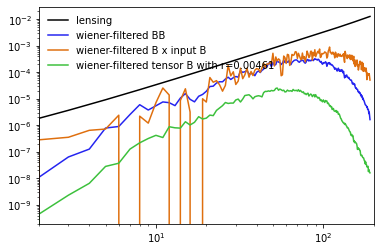

In [9]:
xlim(2,200)
loglog(l,fac*pobj.lcl[2,:lmax+1],label='lensing',color='k',ls='-')
loglog(l,fac*BB/fsky,label='wiener-filtered BB')
loglog(l,fac*xB/fsky,label='wiener-filtered B x input B')
loglog(l,fac*.00461*bb/fsky,label='wiener-filtered tensor B with r=0.00461')
#loglog(l,pobj.lcl[2,:lmax+1]**2/(pobj.lcl[2,:lmax+1]+pobj.clfg[:lmax+1]),label='approx',color='k',ls='--')
legend(loc=2)

In [10]:
sn = np.sqrt(fsky*np.sum((l[2:]+.5)*(1e-3*bb[2:]/BB[2:])**2))
print(sn)

0.6276540546402435


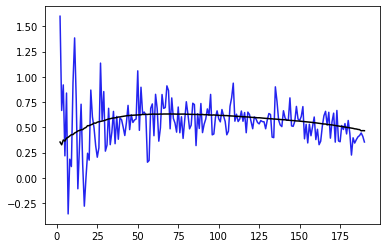

In [11]:
plot(xB/np.sqrt(fsky*BB*iB))
plot(np.sqrt(pobj.lcl[2,:lmax+1]/(pobj.lcl[2,:lmax+1]+pobj.clfg[:lmax+1])),color='k',label='--')